In [1]:
!curl -c /tmp/cookies "https://drive.google.com/uc?export=download&id=1AvU1UDSeg4uWfPA8JynjrrNnvg8oa0AZ" > /tmp/intermezzo.html
!curl -L -b /tmp/cookies "https://drive.google.com$(cat /tmp/intermezzo.html | grep -Po 'uc-download-link" [^>]* href="\K[^"]*' | sed 's/\&amp;/\&/g')" > dataset.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3259    0  3259    0     0   8621      0 --:--:-- --:--:-- --:--:--  8598
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1426      0 --:--:-- --:--:-- --:--:--  1426
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  236M    0  236M    0     0  81.3M      0 --:--:--  0:00:02 --:--:--  264M


In [2]:
!pip install rank_bm25

In [3]:
from src.parsing import parse_exemple_file, get_dataset
df = parse_exemple_file()
df.head()

/content/src/parsing.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  header=0, index_col=False, dtype="str",  keep_default_na=False)


,doc_id,doi,year,title,journal_name,authors,abstract,fullbody
0,200,10.5812/jjm.33498,2016,Study of Genetic Variation of Leishmania majo...,Jundishapur Journal of Microbiology,Mansour Dabirzadeh\tMohammad Hashemi\tYahya Ma...,Background Zoonotic cutaneous leishmaniasis (Z...,1. Background Zoonotic cutaneous leishmaniasis...
1,201,10.5812/jjm.32388,2016,Characterization of Oxacillinase and Metallo-β...,Jundishapur Journal of Microbiology,Saeed Shoja\tMojtaba Moosavian\tSoodabeh Rosta...,Background: Carbapenem resistant Acinetobacter...,"1. Background In recent years, Acinetobacter b..."
2,202,10.5812/jjm.28291,2016,Staphylococcus aureus Isolates Carrying Panto...,Jundishapur Journal of Microbiology,Laleh Shariati\tMajid Validi\tAli Mohammad Has...,Background: A diversity of virulence factors w...,1. Background Staphylococcus aureus is a commo...
3,203,10.5812/jjm.10168,2014,In Vitro Study of Potentially Probiotic lacti...,Jundishapur Journal of Microbiology,Hooshang Niazi Amraii\tHamid Abtahi\tParvaneh ...,Background: Probiotic microorganisms are selec...,1. Background Great attention is currently dra...
4,204,10.5812/jjm.17824,2014,Phenotypic Characteristics and Probiotic Poten...,Jundishapur Journal of Microbiology,Nasrin Noohi\tNasrin Noohi\tGholamhosein Ebrah...,"Background: Lactic acid bacteria, especially L...",1. Background The normal flora bacteria in int...


In [4]:
ds = get_dataset(df)
print( "total number of title-abstract pairs:", len(ds) )
print( "First example in the dataset:\nTitle:\t%s\nAbstract:\t%s"%( ds[0][0], ds[0][1] ) )

total number of title-abstract pairs: 10000
First example in the dataset:
Title:	Study of Genetic Variation of  Leishmania major  Based on Internal Transcribed Spacer 1 (ITS1) in Chabahar, Iran
Abstract:	Background Zoonotic cutaneous leishmaniasis (ZCL) is polymorphic disease that may show various clinical manifestations. Objectives This study investigates the determination of genetic variation within the species of Leishmania major isolates from new cases in Chabahar, a port city in Southeast Iran (situated at the Iran-Pakistan border). Migration in this region indicates that leishmaniasis is spreading gradually, and a new micro-habitat focus appears each year. Materials and Methods A variety of nucleic acid detection methods that target both DNA and RNA have been developed. The restriction fragment length polymorphism analysis of amplified internal transcribed spacer 1 with polymerase chain reaction (ITS1-RFLP PCR) assay is a multipurpose tool for the diagnosis of Leishmania from cli

In [0]:
for record in ds:
    record[0] = " ".join(tokenizer.tokenize( record[0].lower()  ))
    record[1] = " ".join(tokenizer.tokenize( record[1].lower()  ))

In [0]:
import nltk
from nltk import RegexpTokenizer
# This tokenizer is simply to use a regular expression "\w+" to remove all characters which are not from the set [0-9A-Za-z]
# This is not the best one but is very fast. Explore the nltk package for more powerful tokenizer!
tokenizer = RegexpTokenizer( "\w+" )

def tokenizer_fn(doc):
    return doc.split()

In [0]:
queries, corpus = zip( *ds )

In [0]:
from src.ranking import Bm25Ranker
bm25 = Bm25Ranker(corpus, tokenizer_fn)

In [8]:
query = queries[0]
doc_scores = bm25.score_query(query)
doc_scores

array([75.27870625, 17.13461739, 15.65675489, ...,  0.        ,
        0.        ,  0.        ])

In [9]:
Knn_ids = bm25.knn_prediction(query, )
Knn_ids

array([   0,  363, 7804,   19,  331, 7825,  439,  386,  141, 2090, 3164,
        201, 2399, 4450,  737,   41, 5338,   23,  303,  432])

In [0]:
from src.scoring import ml_score, plot_ml_curve, plot_ml_histograms

In [0]:
prediction = bm25.batch_knn_prediction(queries)

In [56]:
real_query_ids = [i for i in range(len(queries))]
ml_score(np.array(real_query_ids), np.array(prediction), 1)

0.8088

In [57]:
ml_score(np.array(real_query_ids), np.array(prediction), 20)

0.8527

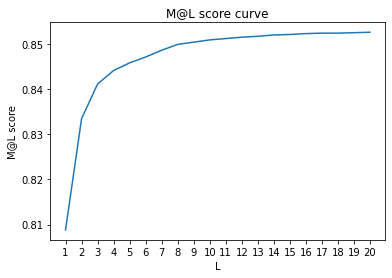

In [58]:
plot_ml_curve(np.array(real_query_ids), np.array(prediction))

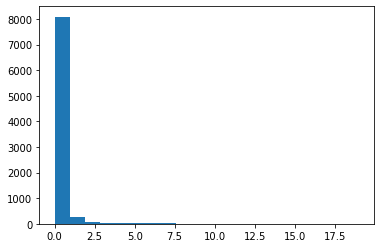

In [59]:
plot_ml_histograms(real_query_ids, prediction)

In [11]:
## Downloading the sent2vec model
!curl -c /tmp/cookies "https://drive.google.com/uc?export=download&id=1PGrbSf7mksHbYAmTpOBEl6nQl7din5Vj" > /tmp/intermezzo.html
!curl -L -b /tmp/cookies "https://drive.google.com$(cat /tmp/intermezzo.html | grep -Po 'uc-download-link" [^>]* href="\K[^"]*' | sed 's/\&amp;/\&/g')" > sent2vec_model.bin

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3256    0  3256    0     0   7661      0 --:--:-- --:--:-- --:--:--  7643
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0    864      0 --:--:-- --:--:-- --:--:--   862
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 8404M    0 8404M    0     0  65.2M      0 --:--:--  0:02:08 --:--:-- 50.7M


In [12]:
## Install sent2vec
## Installing sent2vec
!git clone https://github.com/epfml/sent2vec.git
!cd sent2vec &&  make && pip install . 

fatal: destination path 'sent2vec' already exists and is not an empty directory.
make: Nothing to be done for 'opt'.
Processing /content/sent2vec
  Created wheel for sent2vec: filename=sent2vec-0.0.0-cp36-cp36m-linux_x86_64.whl size=1126064 sha256=50e1fea5d8f6209de9b987dcbdbc1eaf25feadc00547ca2b1be194b3ae0ed994
  Stored in directory: /tmp/pip-ephem-wheel-cache-ot4w8cko/wheels/b1/65/d7/f2c679e0086741bea69f0c4478303b6506bbf4c78dea82f565
Successfully built sent2vec
  Found existing installation: sent2vec 0.0.0
    Uninstalling sent2vec-0.0.0:
      Successfully uninstalled sent2vec-0.0.0


In [0]:
from src.ranking import Sent2VecRanker
model = Sent2VecRanker(corpus)

In [15]:
title_list , abstract_list = zip(*ds)
query = title_list[0]
print("Query ID:\t%d"%( 0 ))
print("20 closest documents ids:", model.knn_prediction(query))

Query ID:	0
20 closest documents ids: [   0  141  306  363  700 7804  386  660  432  796 7825  708  737  749
  316  200  309  585   19   15]
